# California House Pricing

## Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem Statement

### 2) Data Collection

Dataset Source -
https://www.kaggle.com/datasets/camnugent/california-housing-prices

In [148]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.impute import SimpleImputer
from scipy.stats import zscore

In [149]:
# Import the CSV Data as Pandas DataFrame

df = pd.read_csv(r"data\housing.csv")

In [150]:
# Show Top 5 Records
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.01445,452600.0,NEAR BAY
1,-122.22,37.86,21.0,5682.5,1106.0,2401.0,1090.0,8.01445,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.25740,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.64310,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.84620,342200.0,NEAR BAY


In [151]:
# Shape of the dataset

df.shape

(20433, 10)

### 2.2 Dataset information

1. longitude: A measure of how far west a house is; a higher value is farther west
2. latitude: A measure of how far north a house is; a higher value is farther north
3. housingMedianAge: Median age of a house within a block; a lower number is a newer building
4. totalRooms: Total number of rooms within a block
5. totalBedrooms: Total number of bedrooms within a block
6. population: Total number of people residing within a block
7. households: Total number of households, a group of people residing within a home unit, for a block
8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
9. medianHouseValue: Median house value for households within a block (measured in US Dollars)

3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

In [152]:
# 3.1 Check Missing values

df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

There are 207 missing values in total_bedrooms        

In [153]:
df = df.dropna(axis=0)

In [154]:
# 3.1 Check Missing values

df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [155]:
# 3.2 Check Duplicates

df.duplicated().sum()

0

There are no duplicates values in the data set

In [156]:
# 3.3 Check data types

# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20433 entries, 0 to 20432
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [157]:
# 3.4 Checking the number of unique values of each column

df.nunique()

longitude               844
latitude                861
housing_median_age       52
total_rooms            4790
total_bedrooms         1166
population             2914
households             1083
median_income         12210
median_house_value     3770
ocean_proximity           5
dtype: int64

In [158]:
# 3.5 Check statistics of data set

df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.00000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2440.46557,502.538076,1335.894240,468.742426,3.801660,205991.542896
std,2.003578,2.136348,12.591805,1394.61925,287.085265,763.964234,264.981678,1.657657,113262.229289
min,-124.350000,32.540000,1.000000,2.00000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.00000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.00000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.00000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,5682.50000,1173.500000,3124.500000,1090.000000,8.014450,482500.000000


#### Insight

From above description of numerical data, means are from different ranges 3.87 - 206864.413155
All standard deviations are are from different ranges 1.899291 - 115435.667099

In [159]:
# 3.7 Exploring Data

df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.01445,452600.0,NEAR BAY
1,-122.22,37.86,21.0,5682.5,1106.0,2401.0,1090.0,8.01445,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.25740,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.64310,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.84620,342200.0,NEAR BAY


In [160]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.01445,452600.0,NEAR BAY
1,-122.22,37.86,21.0,5682.5,1106.0,2401.0,1090.0,8.01445,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.25740,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.64310,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.84620,342200.0,NEAR BAY


In [161]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 9 numerical features : ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']

We have 1 categorical features : ['ocean_proximity']


In [162]:
# Finding most expensive and least expensive 

most_expensive = df.loc[df['median_house_value'].idxmax()]
least_expensive = df.loc[df['median_house_value'].idxmin()]

print(most_expensive,"/n" ,least_expensive)

longitude              -122.27
latitude                  37.8
housing_median_age        52.0
total_rooms              249.0
total_bedrooms            78.0
population               396.0
households                85.0
median_income           1.2434
median_house_value    482500.0
ocean_proximity       NEAR BAY
Name: 89, dtype: object /n longitude             -122.74
latitude                39.71
housing_median_age       16.0
total_rooms             255.0
total_bedrooms           73.0
population               85.0
households               38.0
median_income          1.6607
median_house_value    14999.0
ocean_proximity        INLAND
Name: 2502, dtype: object


### 4. Exploring Data ( Visualization )

4.1 Visualize average score distribution to make some conclusion.

In [163]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

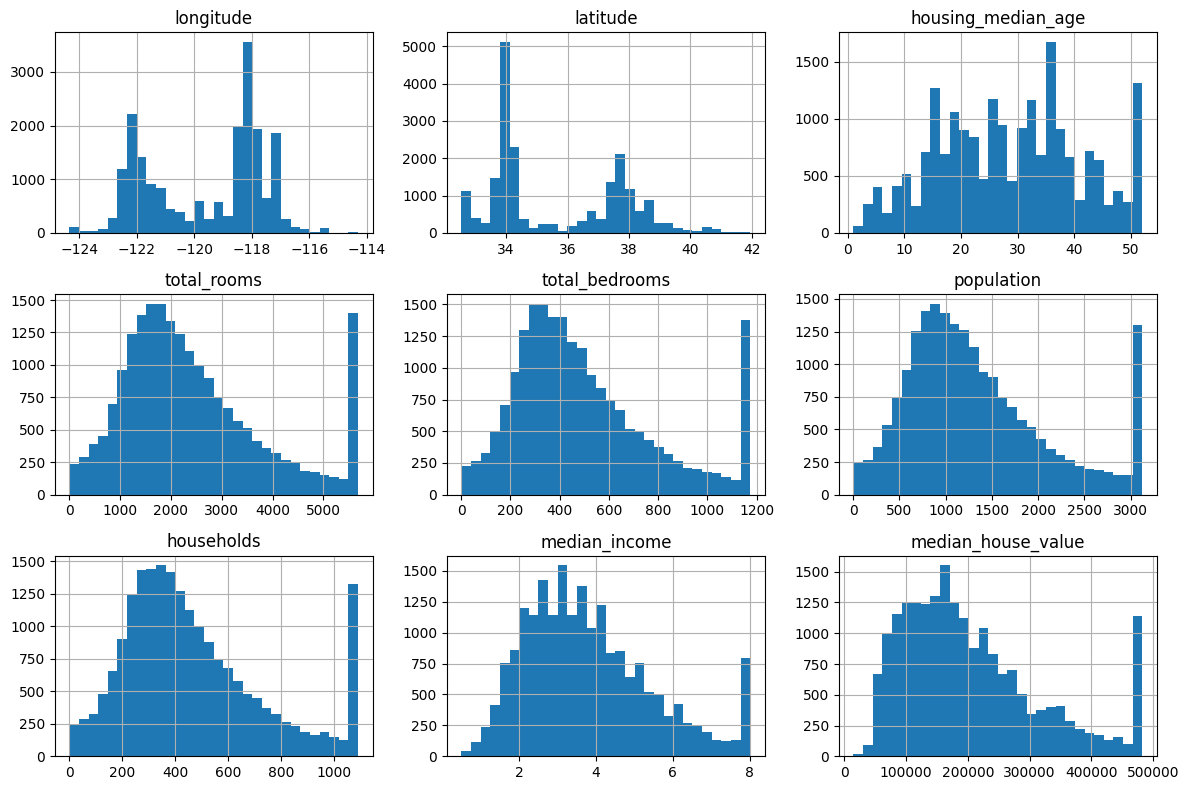

In [164]:
# 4.1.1 Histogram

df.hist(bins=30, figsize=(12, 8))
plt.tight_layout()
plt.show()

In [165]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

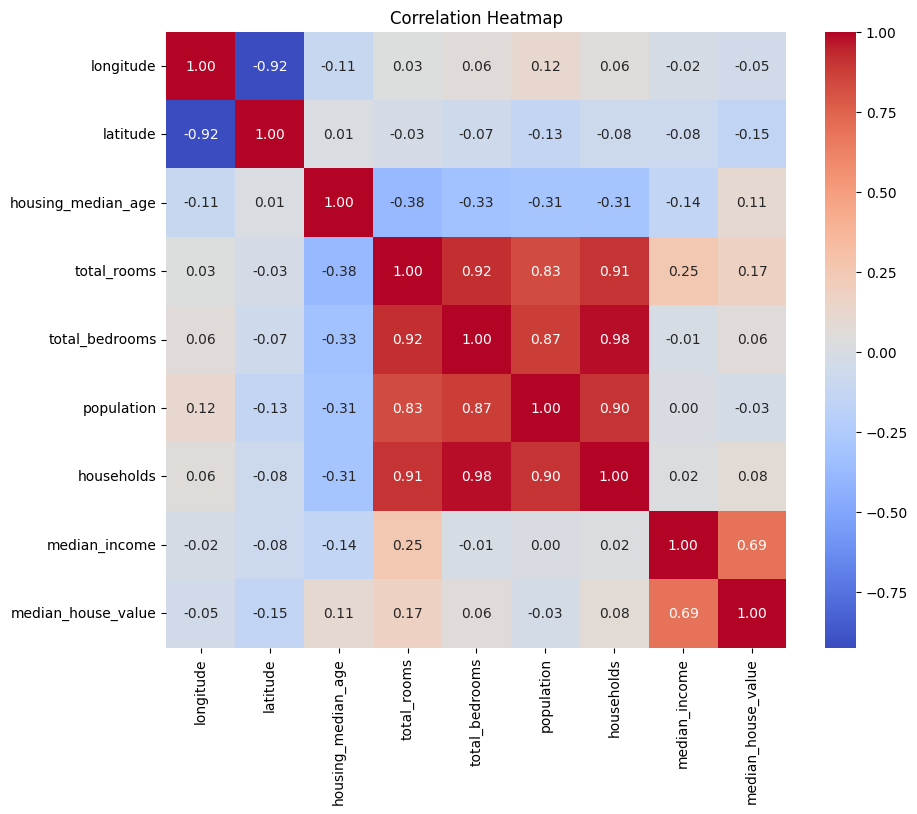

In [166]:
# Correlation

correlation_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

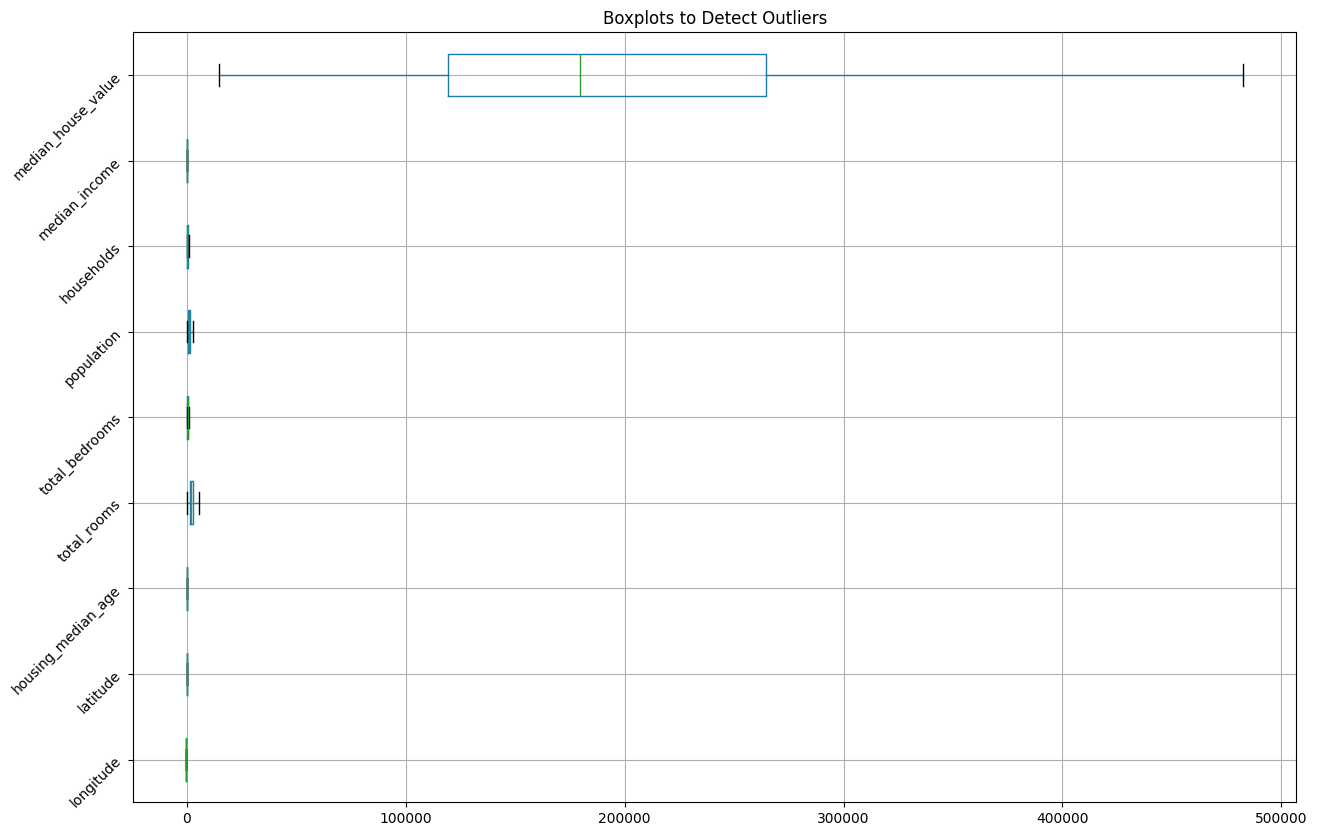

In [167]:
# Outliers

plt.figure(figsize=(15, 10))
df.boxplot(rot=45, vert=False)
plt.title("Boxplots to Detect Outliers")
plt.show()

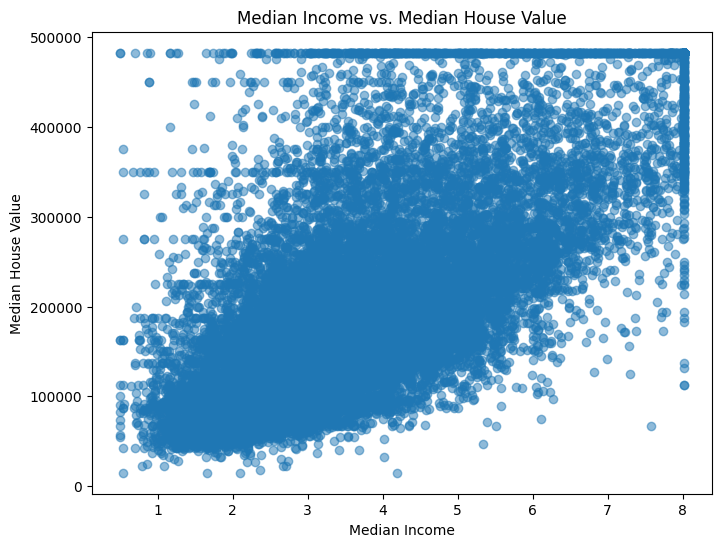

In [168]:
# Relationships

plt.figure(figsize=(8, 6))
plt.scatter(df['median_income'], df['median_house_value'], alpha=0.5)
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('Median Income vs. Median House Value')
plt.show()

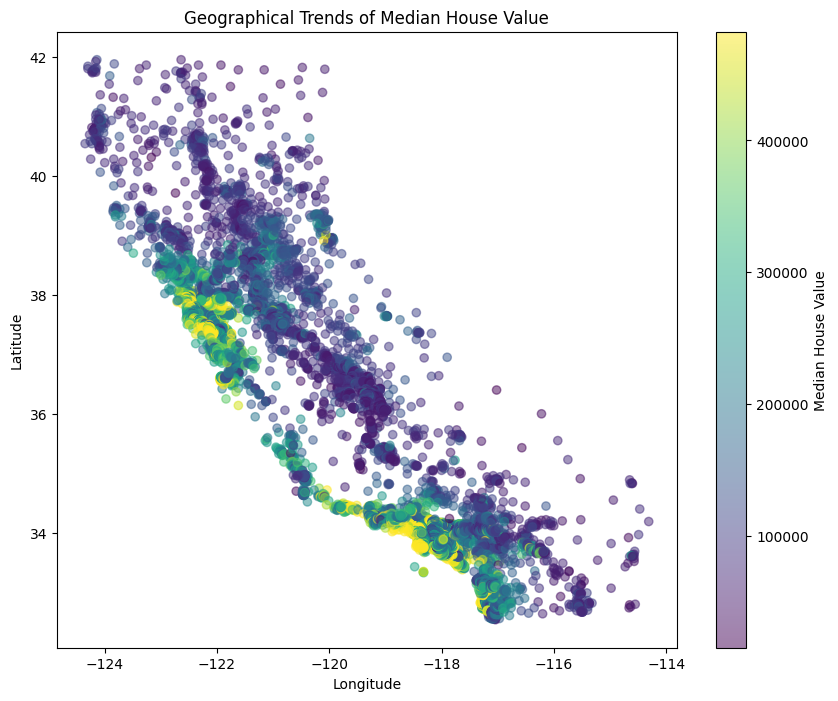

In [169]:
# Geographical Trends

plt.figure(figsize=(10, 8))
plt.scatter(df['longitude'], df['latitude'], c=df['median_house_value'], cmap='viridis', alpha=0.5)
plt.colorbar(label='Median House Value')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Trends of Median House Value')
plt.show()


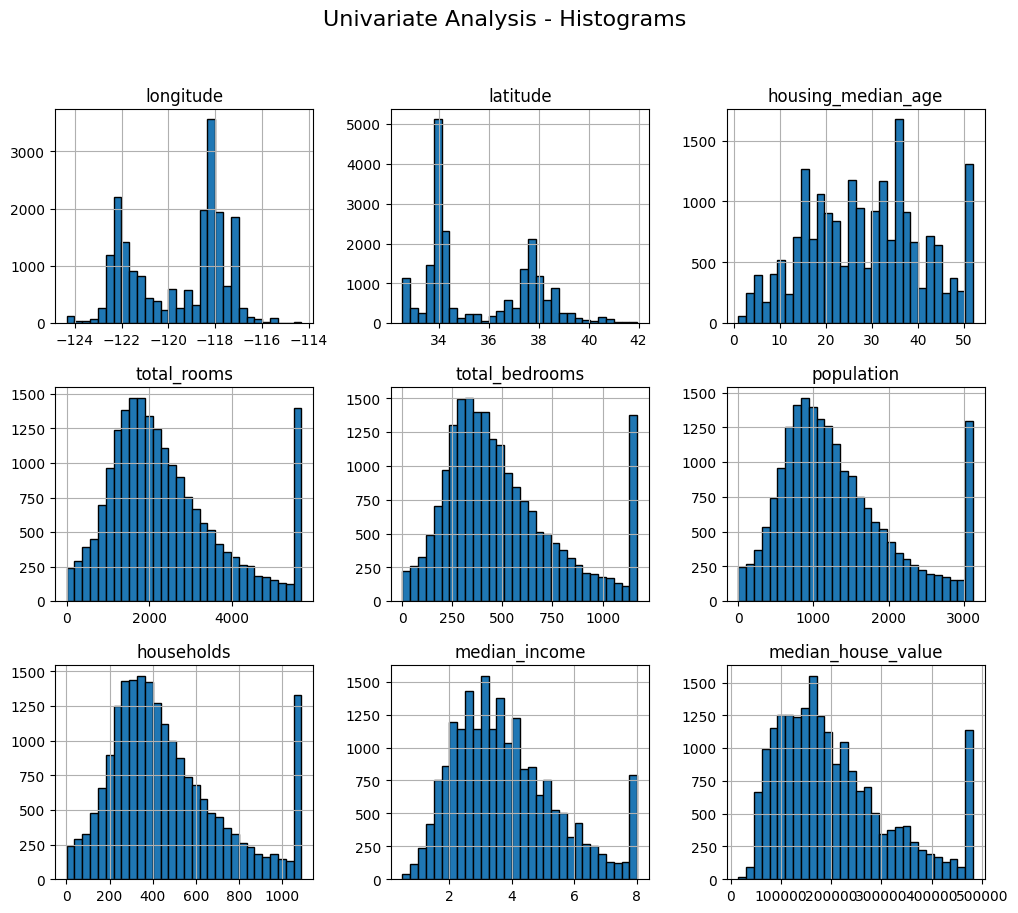

ValueError: num must be an integer with 1 <= num <= 9, not 10

In [170]:
# Histograms
df.hist(figsize=(12, 10), bins=30, edgecolor='black')
plt.suptitle('Univariate Analysis - Histograms', fontsize=16)
plt.show()

# Boxplots
plt.figure(figsize=(12, 8))
for i, col in enumerate(df.columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df, y=col)
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


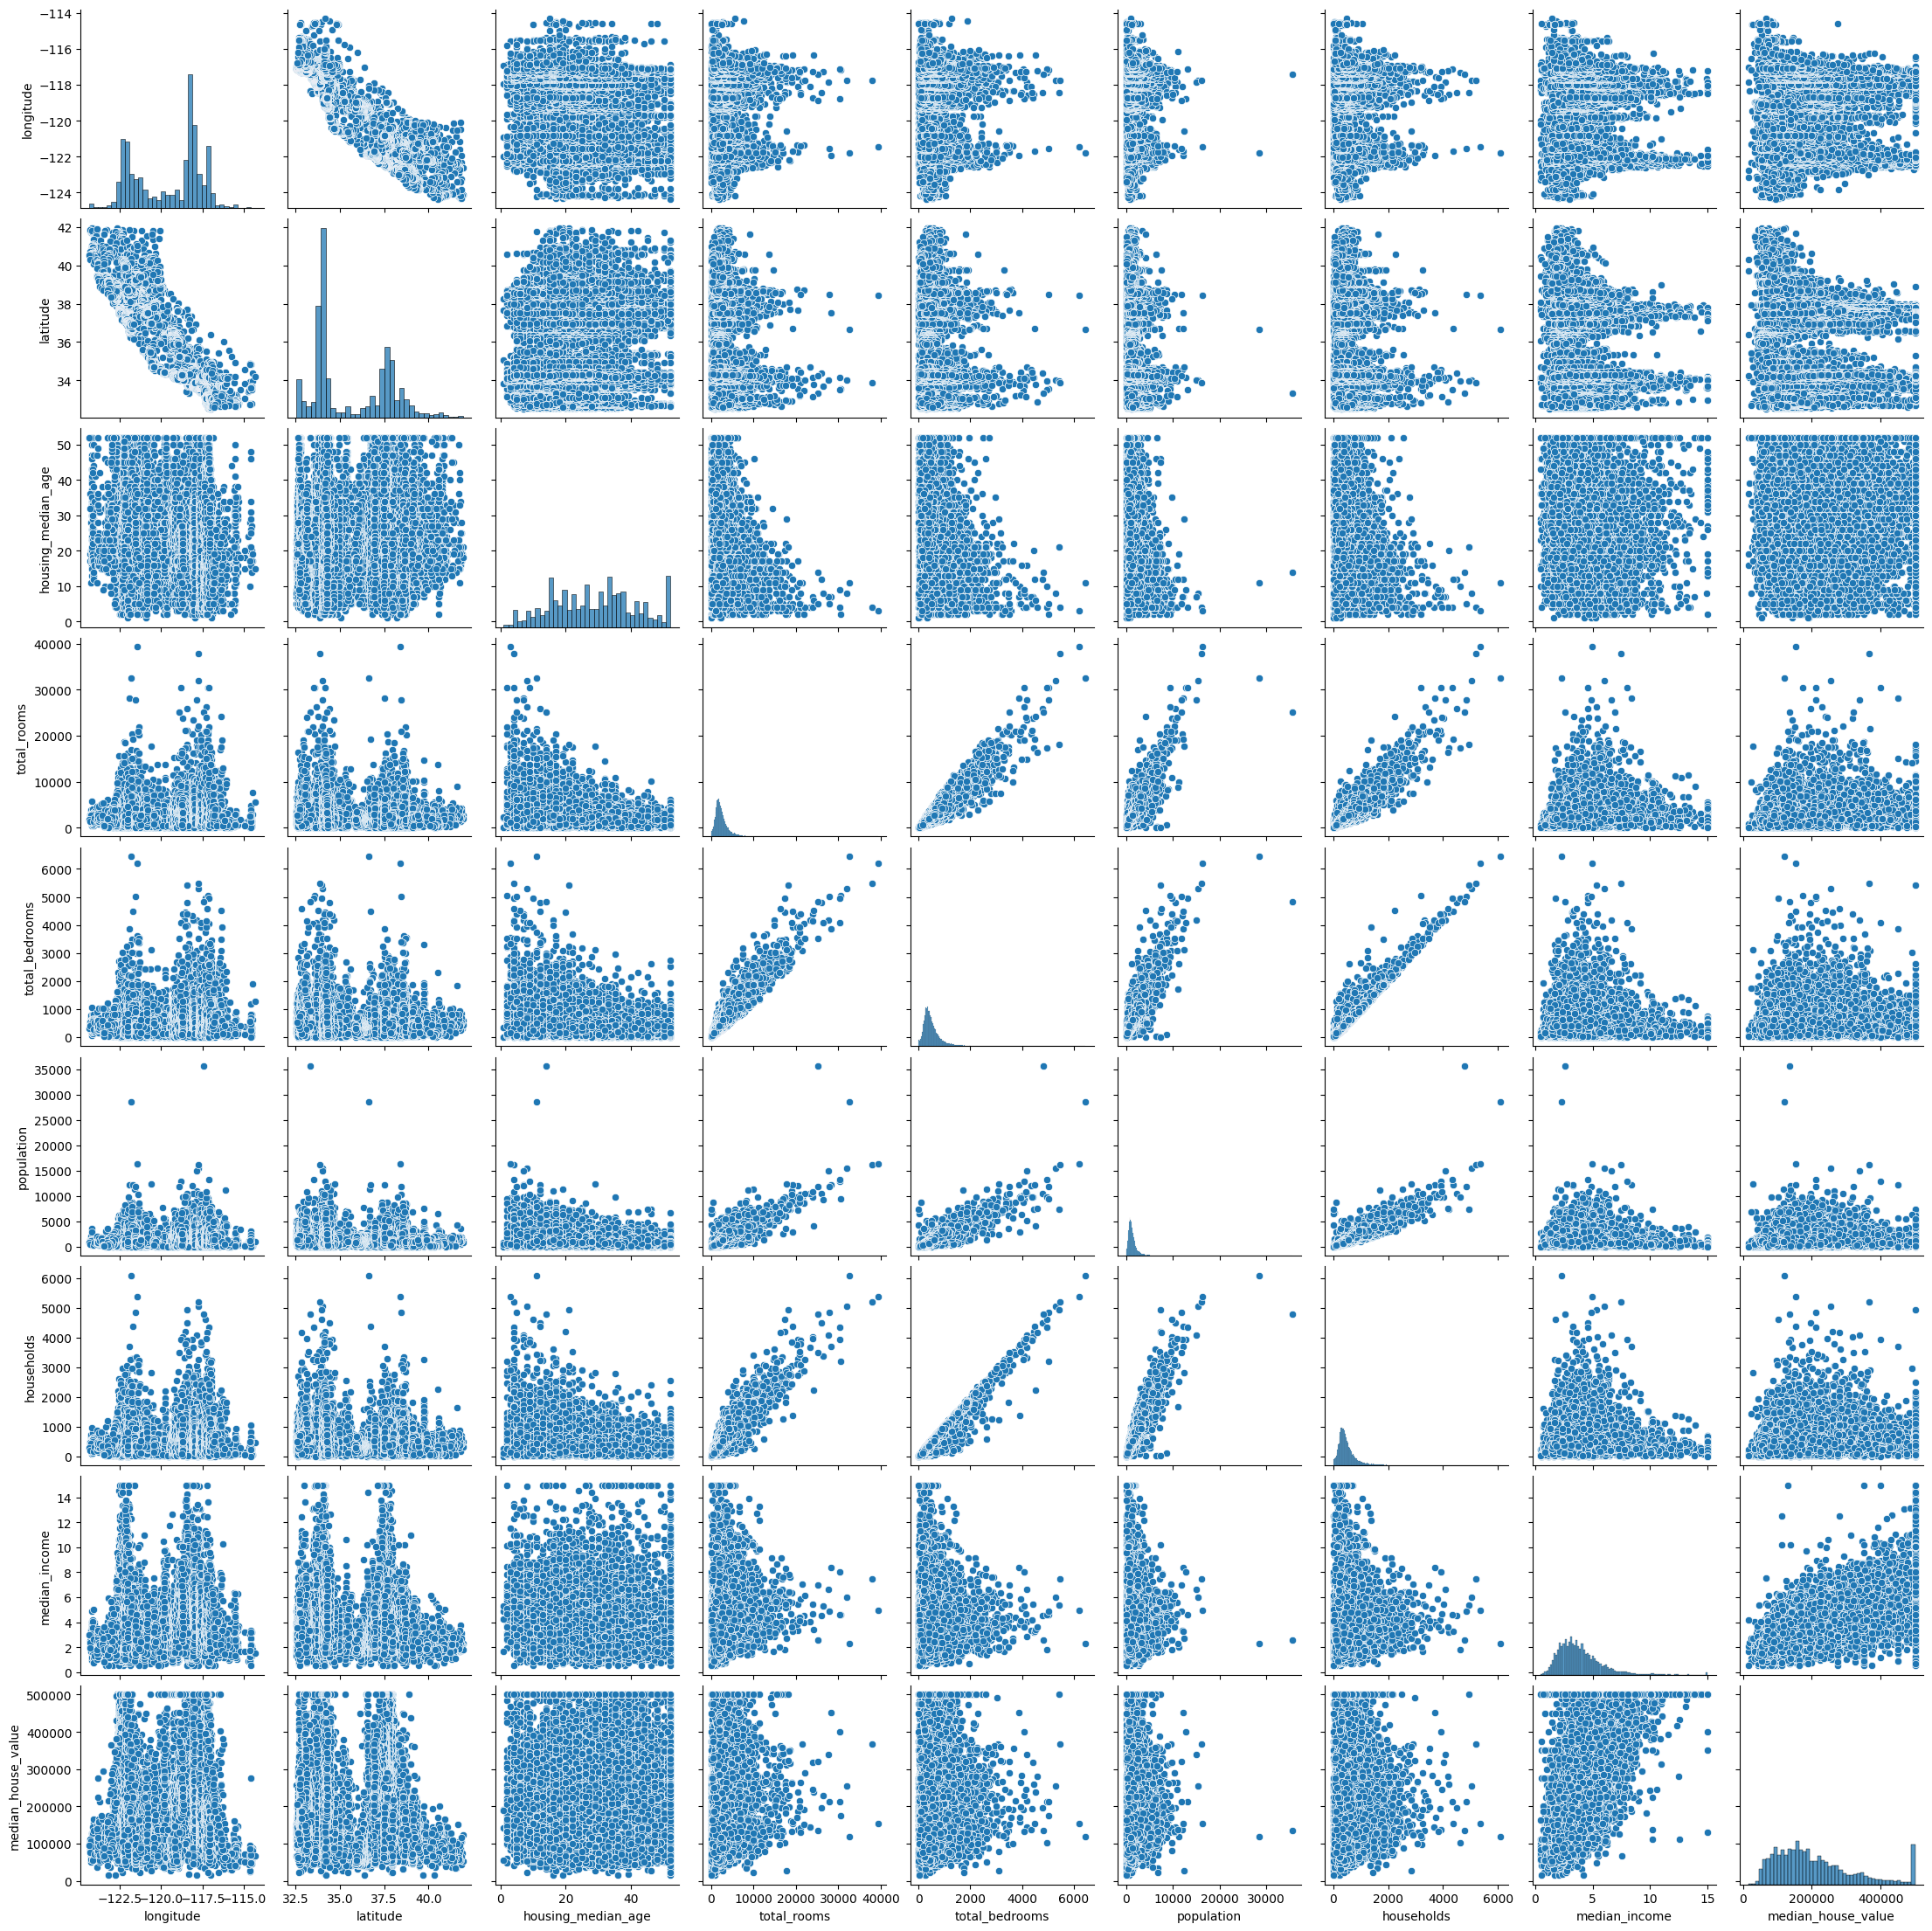

In [ ]:
sns.pairplot(df)
plt.show()

Frequency counts for ocean_proximity:
ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: count, dtype: int64



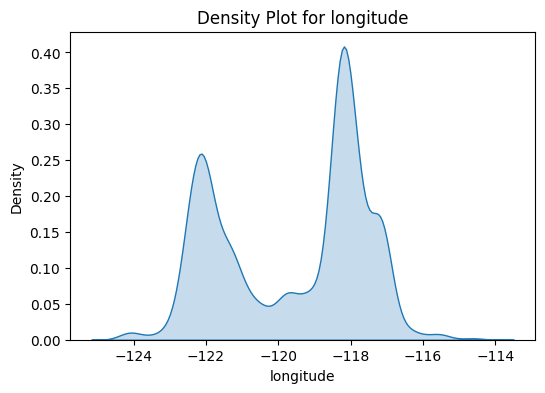

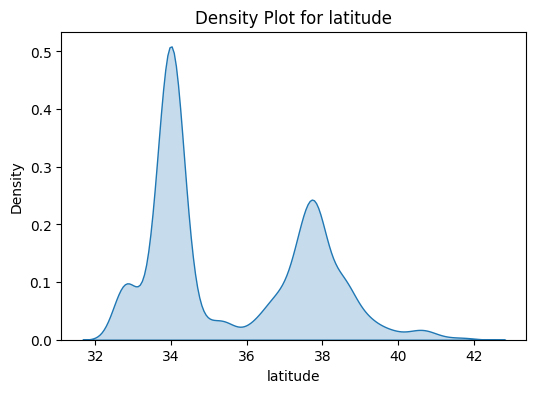

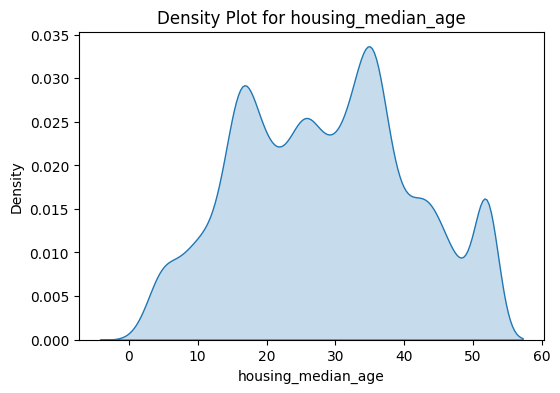

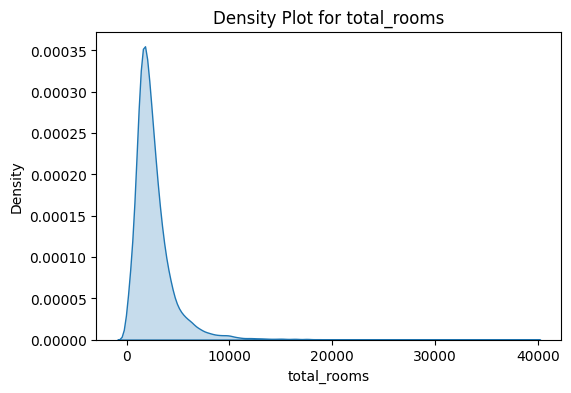

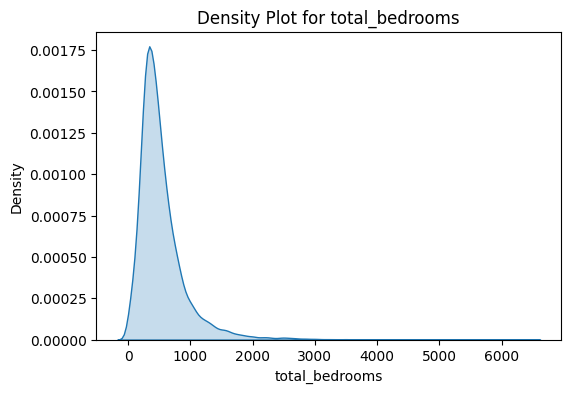

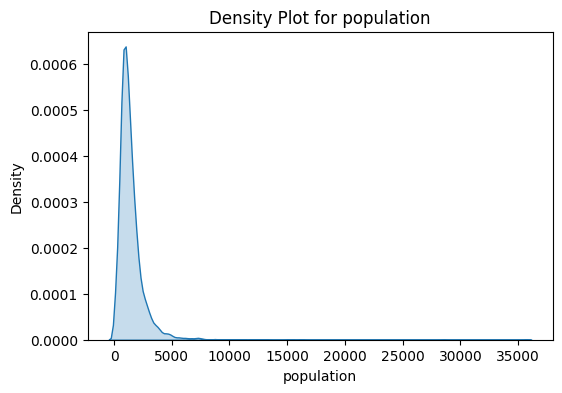

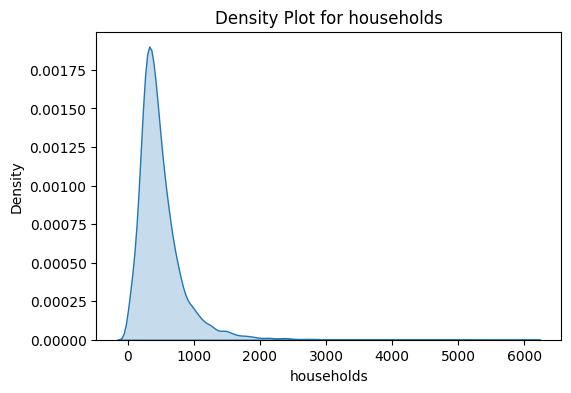

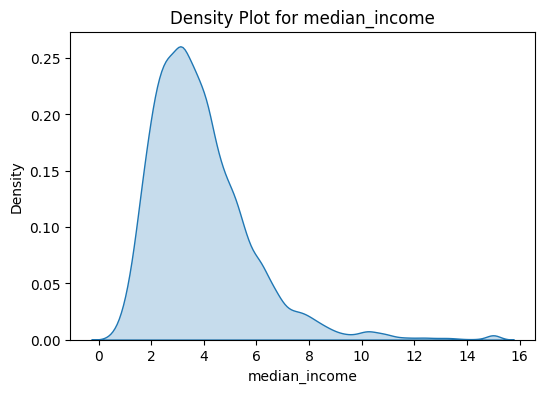

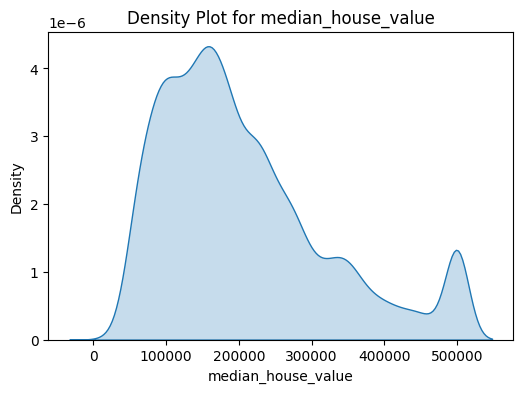

Descriptive Statistics:
                       count           mean            std         min  \
longitude           20433.0    -119.570689       2.003578   -124.3500   
latitude            20433.0      35.633221       2.136348     32.5400   
housing_median_age  20433.0      28.633094      12.591805      1.0000   
total_rooms         20433.0    2636.504233    2185.269567      2.0000   
total_bedrooms      20433.0     537.870553     421.385070      1.0000   
population          20433.0    1424.946949    1133.208490      3.0000   
households          20433.0     499.433465     382.299226      1.0000   
median_income       20433.0       3.871162       1.899291      0.4999   
median_house_value  20433.0  206864.413155  115435.667099  14999.0000   

                            25%          50%         75%          max  \
longitude             -121.8000    -118.4900    -118.010    -114.3100   
latitude                33.9300      34.2600      37.720      41.9500   
housing_median_age      1

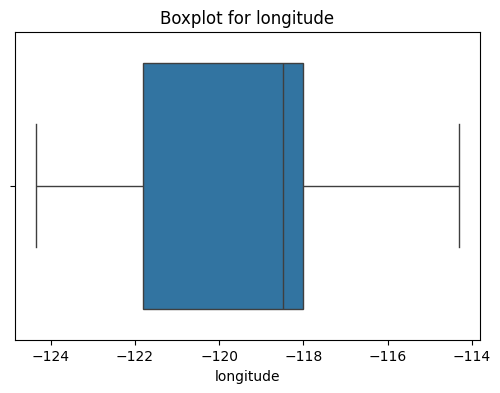

Number of outliers in longitude: 0


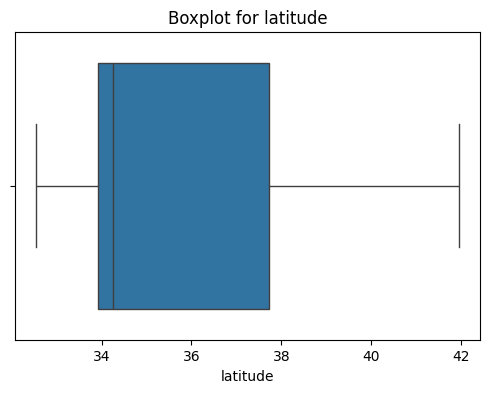

Number of outliers in latitude: 0


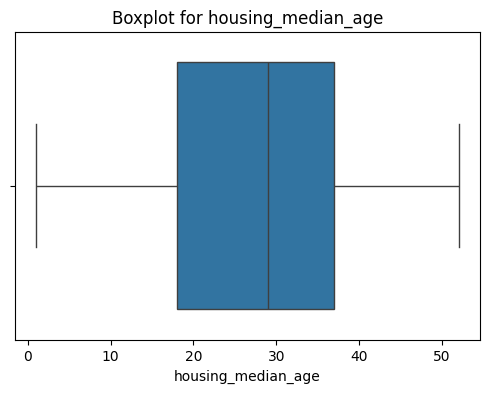

Number of outliers in housing_median_age: 0


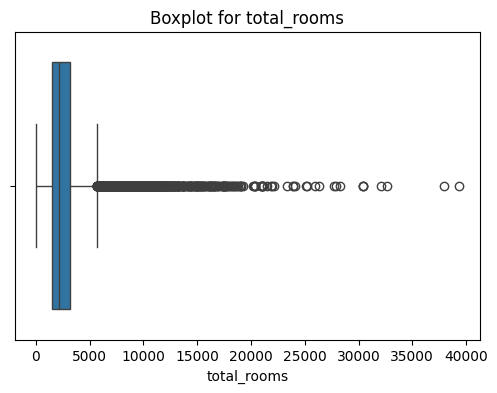

Number of outliers in total_rooms: 371


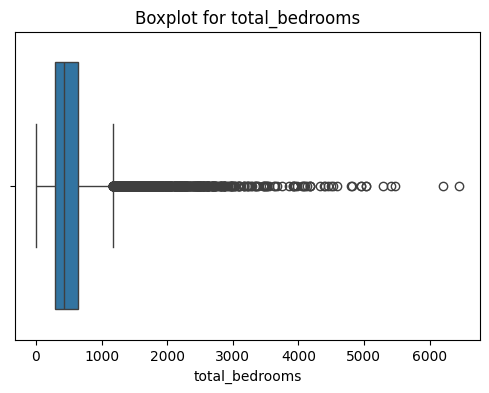

Number of outliers in total_bedrooms: 370


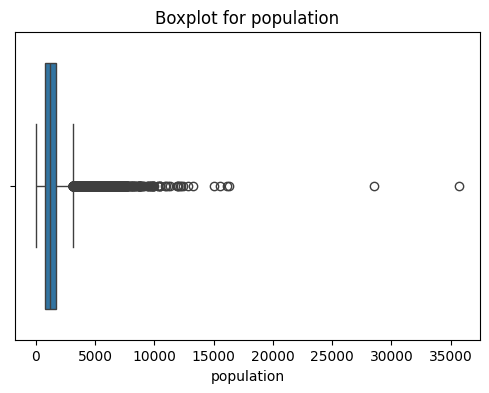

Number of outliers in population: 339


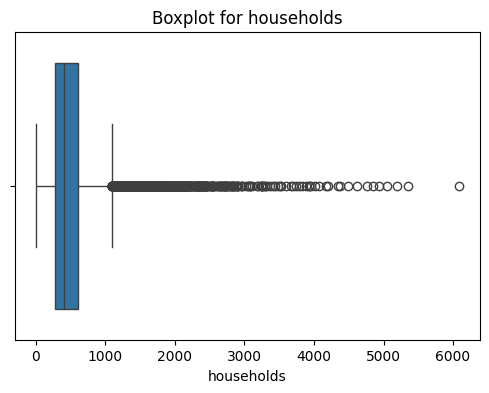

Number of outliers in households: 362


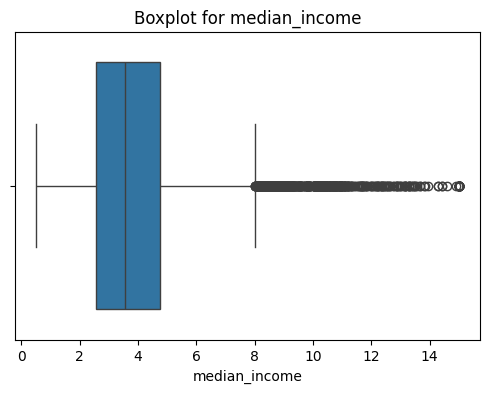

Number of outliers in median_income: 340


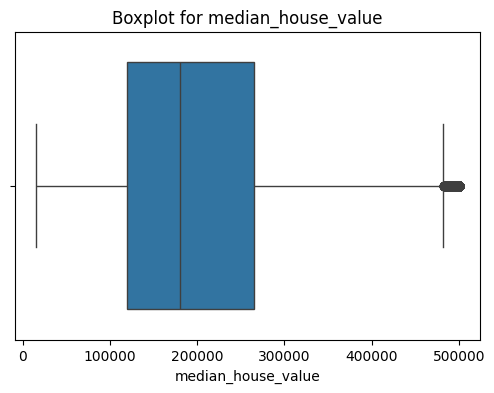

Number of outliers in median_house_value: 0


In [ ]:
# 1. Frequency Counts for Categorical Columns
if 'ocean_proximity' in df.columns:
    print(f"Frequency counts for ocean_proximity:\n{df['ocean_proximity'].value_counts()}\n")

# 2. Density Plots (KDE) for Numeric Columns
numeric_df = df.select_dtypes(include=[np.number])
for col in numeric_df.columns:
    plt.figure(figsize=(6, 4))
    sns.kdeplot(numeric_df[col], fill=True)
    plt.title(f"Density Plot for {col}")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.show()

# 3. Descriptive Statistics for Numeric Columns
desc_stats = numeric_df.describe().T
desc_stats['skewness'] = numeric_df.skew()
desc_stats['kurtosis'] = numeric_df.kurt()
print("Descriptive Statistics:\n", desc_stats)

# 4. Value Range for All Columns
for col in df.columns:
    print(f"Value range for {col}: Min = {df[col].min()}, Max = {df[col].max()}")

# 5. Outlier Detection for Numeric Columns
from scipy.stats import zscore
for col in numeric_df.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=numeric_df[col])
    plt.title(f"Boxplot for {col}")
    plt.xlabel(col)
    plt.show()

    # Z-scores to detect outliers
    outliers = df[np.abs(zscore(numeric_df[col])) > 3]
    print(f"Number of outliers in {col}: {len(outliers)}")


In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:

def replace_outliers_with_bounds(df):
    total_rows = len(df)
    
    for column in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Replace lower outliers with lower bound
        df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
        
        # Replace upper outliers with upper bound
        df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    
    return df

In [ ]:
def find_outliers(df):
    outliers = {}
    total_rows = len(df)
    
    for column in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    # Print the percentage of outliers for each column
    for column, outlier_data in outliers.items():
        percent_outliers = (len(outlier_data) / total_rows) * 100
        print(f"Percentage of outliers in {column}: {percent_outliers:.2f}%")
    
    return outliers

In [ ]:
df = replace_outliers_with_bounds(df)


In [ ]:
import numpy as np

def find_outliers(df):
    outliers = {}
    total_rows = len(df)
    
    for column in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    # Print the percentage of outliers for each column
    for column, outlier_data in outliers.items():
        percent_outliers = (len(outlier_data) / total_rows) * 100
        print(f"Percentage of outliers in {column}: {percent_outliers:.2f}%")
    
    return outliers


In [171]:
df.to_csv(r"data\housing.csv", index=False)

In [172]:
find_outliers(df)

Percentage of outliers in longitude: 0.00%
Percentage of outliers in latitude: 0.00%
Percentage of outliers in housing_median_age: 0.00%
Percentage of outliers in total_rooms: 0.00%
Percentage of outliers in total_bedrooms: 0.00%
Percentage of outliers in population: 0.00%
Percentage of outliers in households: 0.00%
Percentage of outliers in median_income: 0.00%
Percentage of outliers in median_house_value: 0.00%


{'longitude': Empty DataFrame
 Columns: [longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value, ocean_proximity]
 Index: [],
 'latitude': Empty DataFrame
 Columns: [longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value, ocean_proximity]
 Index: [],
 'housing_median_age': Empty DataFrame
 Columns: [longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value, ocean_proximity]
 Index: [],
 'total_rooms': Empty DataFrame
 Columns: [longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value, ocean_proximity]
 Index: [],
 'total_bedrooms': Empty DataFrame
 Columns: [longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value, ocean_proximity]
 I